In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
''' Distribution Graphs '''
def plot_per_column_dist(df, n_graph_shown, n_graph_per_row):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    n_rows, n_cols = df.shape
    column_names = list(df)
    n_graph_row = (n_cols + n_graph_per_row - 1) / n_graph_per_row
    plt.figure(num = None, figsize = (6 * n_graph_per_row, 8 * n_graph_row), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(n_cols, n_graph_shown)):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        columns_df = df.iloc[:, i]
        if (not np.issubdtype(type(columns_df.iloc[0]), np.number)):
            valueCounts = columns_df.value_counts()
            valueCounts.plot.bar()
        else:
            columns_df.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{column_names[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
''' Correlation Matrix '''
def plot_corr_mat(df, graph_width):
    file_name = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graph_width, graph_width), dpi=80, facecolor='w', edgecolor='k')
    corr_matrix = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corr_matrix)
    plt.title(f'Correlation Matrix for {file_name}', fontsize=15)
    plt.show()

In [3]:
''' Scatter and Density Plots '''
def plot_scatter_mat(df, plot_size, text_size):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    ## dropping null values
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    column_names = list(df)
    if len(column_names) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        column_names = column_names[:10]
    df = df[column_names]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plot_size, plot_size], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=text_size)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [5]:
''' reading dataset '''
n_rows = 1000

df = pd.read_csv('kaggle_income.csv')
df.dataframeName = 'kaggle_income.csv'

In [6]:
''' displaying first 5 rows of data '''
df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [7]:
''' shape of data '''
df.shape

(32526, 19)

In [8]:
''' checking null values '''
df.isnull().sum()

id            0
State_Code    0
State_Name    0
State_ab      0
County        0
City          0
Place         0
Type          0
Primary       0
Zip_Code      0
Area_Code     0
ALand         0
AWater        0
Lat           0
Lon           0
Mean          0
Median        0
Stdev         0
sum_w         0
dtype: int64

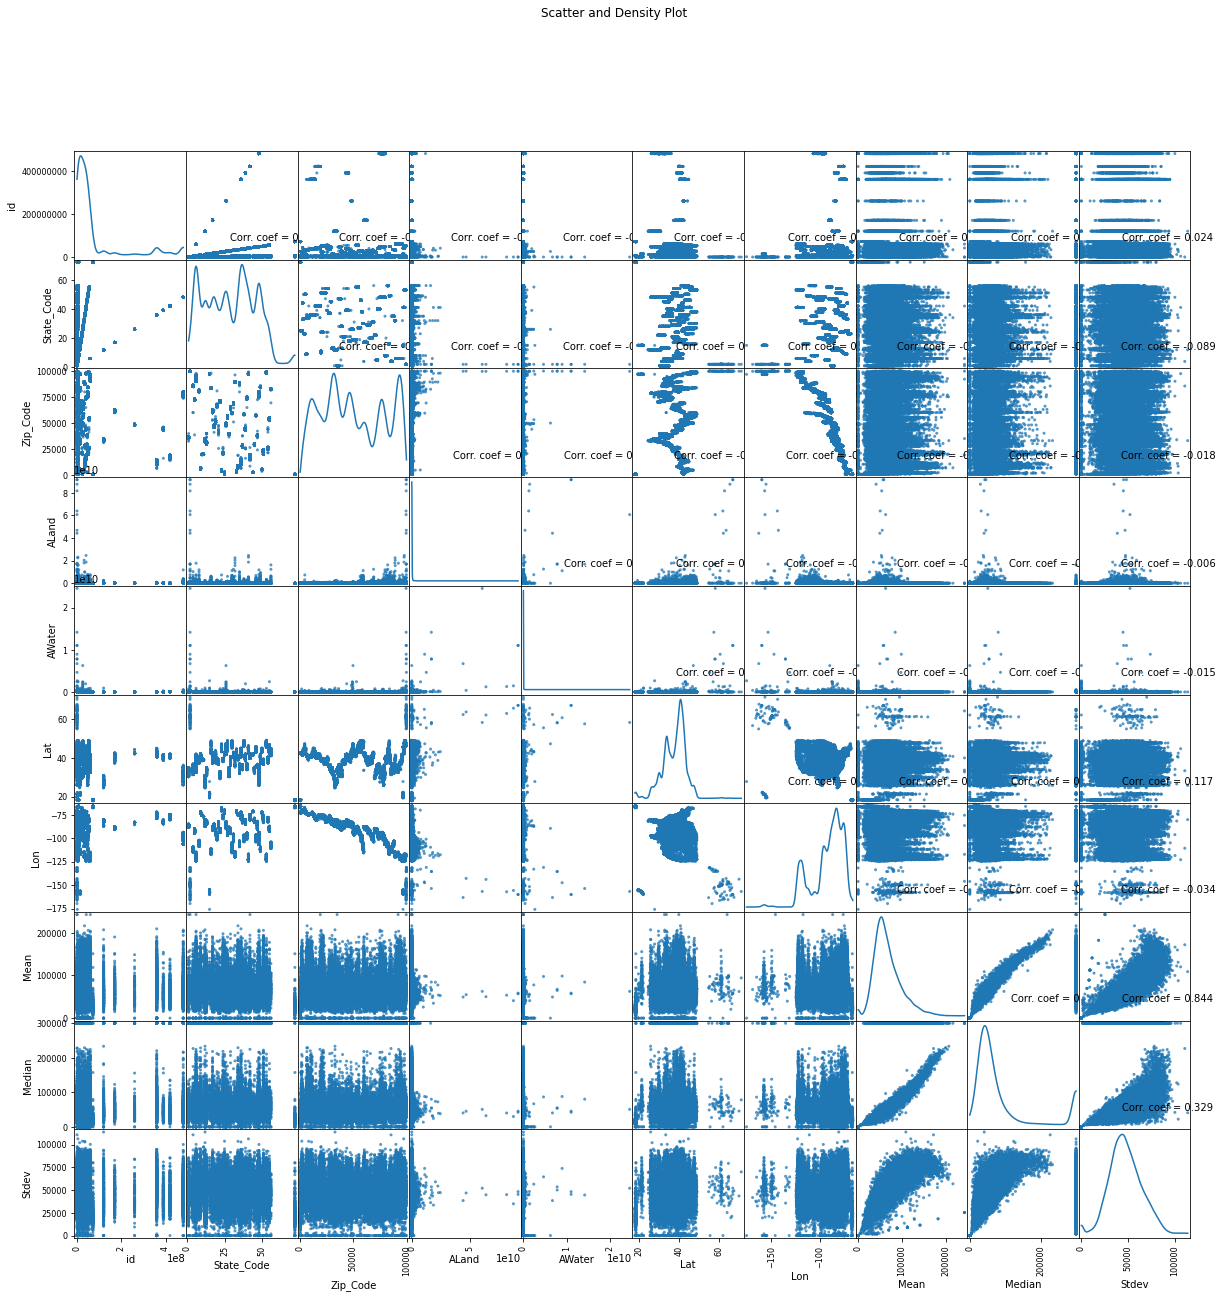

In [9]:
plot_scatter_mat(df, 20, 10)

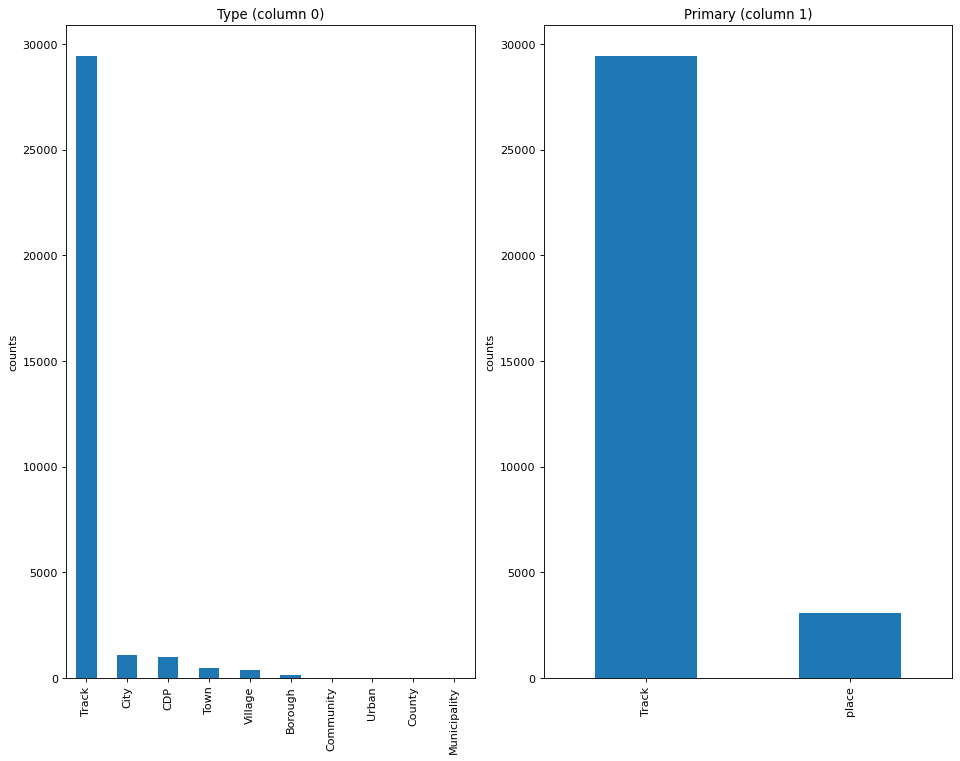

In [11]:
plot_per_column_dist(df, 10, 5)

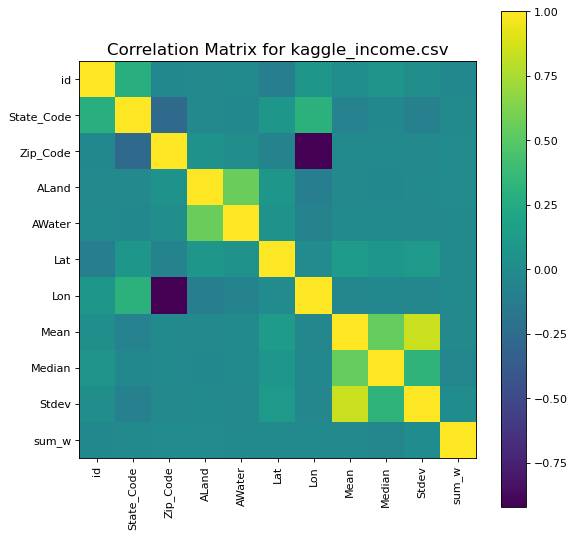

In [13]:
plot_corr_mat(df, 8)